I denne oppgaven skal vi se videre på fire ting: *feilsøking*, bruk av *dokumentsjon*, *løkker* og en ny type figur, *scatterplot*. 

Vi bruker tid spesifikt på **feilsøking** og å bruke **dokumentasjon** fordi dette er en av de siste kursdagene vi har, og dette er to ting det er veldig nyttig å være litt trygg på når dere skal bruke programmering i Python på egenhånd seinere. I denne biten er det flere deloppgaver med feil i som dere skal finne. I andre deloppgaver i denne biten må dere google dere frem for å løse en oppgave. 

**Løkker** beskriver mange forskjellige operasjoner. Vi skal først og fremst se på **for-løkker**. Det heter for-løkker fordi syntaksen er "for disse scenarioene, gjør dette". Dette er praktisk når man skal gjøre nesten det samme mange ganger, f.eks. hvis vi skal finne trendlinjen til hver 20-årsperiode til en tidsserie. Eller plotte alle disse trendlinjene. Eller beregne gjennomsnittet til perioden. Vi ser også så vidt på **if-løkker**: "hvis dette er tilfellet, gjør dette", f.eks., "hvis verdien er større enn 1000, skriv ut verdien". 

**Scatterplot** bruker vi tid på fordi dette er en enkel og veldig beskrivende metode for å se etter sammenhenger mellom to variabler. Flere av dere sammenligner hverandres datasett i oppgavene deres, og dere sammenligner med værmeldingen sine data. Noen av dere vil sikkert også sammenligne med datasett over andre variabler enn temperatur som dere laster ned fra f.eks. seklima.met.no. Å sammenligne to tidsserier kan gi mye informasjon, men scatterplot konsenterer sammenhenger på en litt annen måte som kan være nyttig. I denne biten viser jeg et eksempel, men dere kan gjøre de endringene dere vil. 

---------------

## Del 1: Feilsøking og bruk av dokumentasjon

In [1]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
from EkteDataFunk import loadData # for filinnlasting

In [2]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)

In [3]:
tid.shape, np.squeeze(temp).shape

((160,), (160,))

In [4]:
temp=np.squeeze(temp)

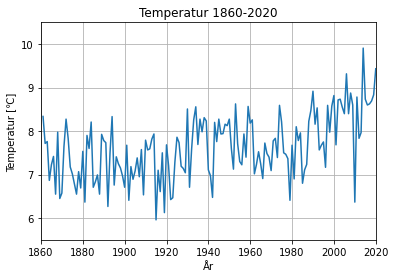

In [5]:
ax=plt.axes() # Lag akser å plotte i

# Plot tidsserien
ax.plot(tid, temp)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.5,10.5]) # Sett grense for y-aksen
ax.grid() # Legg til rutenett (grid) i bakgrunnen
plt.show() 

Finn gjennomsnittstemperaturen til hele perioden

In [6]:
# tips: np.mean()


Finn standardavviket til hele perioden

In [7]:
# tips: google "numpy standard deviation"


Finn indeksen til år 1900. Sjekk at du har riktig indeks ved å skrive ut verdien på denne indeksen i tidsvektoren.

In [8]:
# tips1: husk funksjonen np.where(). 
# tips2: husk at vi har brukt denne funksjonen før. Du kan altså enten bruke 
# google til å finne dokumentasjonen på hvordan denne funksjonen brukes ELLER 
# du kan finne filen der du jobbet med dette tidligere og se hva du gjorde da.


Lag en figur som viser temperatur fra år 1900 til slutten av tidsperioden. Bruk dokumentasjonen til matplotlib.pyplot til å velge linjefarge, markør og markørfarger. 

In [ ]:
# tips: Nedbørsoppgaven_del3_plotting_av_tidsserier


I figuren under har jeg lagt til "minor" grid-linjer og spesifisert farge, linjestil og gjennomsiktighet. Gjør de små grid-linjene oransje og gjør hoved-grid-linjene tykkere. 

In [ ]:
ax=plt.axes()

ax.plot(tid, temp)

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', 
    xlim=[1860,2020], 
    ylim=[5.5,10.5]
) 
ax.minorticks_on()
ax.grid(which='minor', color=[.4, .5, .2], alpha=.3, linestyle=':') 
ax.grid(which='major', linestyle='-') 

plt.show() 

Hva er feil med kodecellen under? Svaret finnes i feilmeldingen under. 
Tips: husk at den mest nyttige informasjonen i en feilmelding sjelden finnes midt i feilmeldingen. 

In [ ]:
ax=plt.axes()

ax.plot(tid, temp)

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', 
    xlim=[1860,2020], 
    ylim=[5.5,10.5]
) 
ax.minorticks_on()
ax.grid(which='minor', color=[.4, .5, 2], alpha=.3, linestyle=':') 
ax.grid(which='major', linestyle='-') 

plt.show() 

Under finner jeg indeksene som deler tidsperioden inn i fire like deler. Men det blir feil når jeg prøver å bruke resultatet til å indeksere tid (for å sjekke at det funket). Hvorfor blir det feil?

In [18]:
indeks=[
    0, 
    len(tid)*1/4, 
    len(tid)*2/4, 
    len(tid)*3/4,
    len(tid)
]

tid[indeks]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
int(indeks[3])

In [ ]:
# Hva om jeg vil konvertere alle elementene i "indeks" til integers?
# Dette går ikke
int(indeks)

In [ ]:
indeks[3]=int(indeks[3])
indeks

In [ ]:
# Dette går, men det er ganske tungvindt. Hva om "indeks" var 20 elementer lang?
indeks[1]=int(indeks[1])
indeks[2]=int(indeks[2])
indeks[3]=int(indeks[3])
indeks[4]=int(indeks[4])

In [ ]:
indeks

## Del 2: For-løkker

Vi tar utgangspunkt i problemet over (å finne indeksene som deler tidsperioden vår inn i fire like deler) til å introdusere **for-løkker**.

Den letteste måten å endre alle elementene i vektoren `indeks` til integers er ved hjelp av en **for-løkke**. Dette er nyttig når man skal gjøre samme operasjon flere ganger. 

*Det finnes en hel oppgave om for-løkker i Ekte Data-filene: "Nedbørsoppgaven_Del5_forløkke.ipynb"*

In [9]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)
temp=np.squeeze(temp)

Aller først et par veldig simple eksempler:

In [ ]:
for ind in range(6):
    print(ind)

In [13]:
list(range(6))

[0, 1, 2, 3, 4, 5]

In [10]:
for i in range(6):
    print(temp[i])

8.336363636363636
7.716666666666666
7.758333333333334
6.866666666666667
7.2250000000000005
7.416666666666668


In [14]:
temp[:6]

array([8.33636364, 7.71666667, 7.75833333, 6.86666667, 7.225     ,
       7.41666667])

In [15]:
for k in range(4):
    print(temp[k]+temp[k+1])

16.0530303030303
15.475
14.625
14.091666666666669


In [17]:
list(range(4)), temp

([0, 1, 2, 3],
 array([8.33636364, 7.71666667, 7.75833333, 6.86666667, 7.225     ,
        7.41666667, 6.55      , 7.975     , 6.45      , 6.575     ,
        7.64545455, 8.275     , 7.83333333, 7.175     , 7.01666667,
        6.78333333, 6.55      , 7.06666667, 6.69166667, 7.53333333,
        6.36666667, 7.9       , 7.6       , 8.20833333, 6.70833333,
        6.83333333, 6.99166667, 6.55      , 7.925     , 7.78333333,
        7.73333333, 6.26666667, 7.49166667, 8.33333333, 6.75833333,
        7.40833333, 7.25      , 7.15      , 6.96666667, 6.70833333,
        7.675     , 6.40833333, 7.18333333, 6.89166667, 7.08333333,
        7.38333333, 6.95      , 7.575     , 6.53333333, 7.79166667,
        7.56666667, 7.59166667, 7.81666667, 7.93333333, 5.95833333,
        7.1       , 6.60833333, 7.5       , 6.125     , 7.68333333,
        7.2       , 6.425     , 6.46666667, 7.28333333, 7.85833333,
        7.73333333, 7.19166667, 7.14166667, 7.04166667, 8.50833333,
        6.70833333, 7.58333333, 8

**Tilbake til de ekte datasettene:**

In [19]:
# Vi lager "indeks" på nytt og konverterer alle elementene til integers ved hjelp av en for-løkke
indeks=[
    0, 
    len(tid)*1/4, 
    len(tid)*2/4, 
    len(tid)*3/4,
    len(tid)
]
indeks

[0, 40.0, 80.0, 120.0, 160]

In [22]:
int(indeks[2])

80

for-løkker gjør en operasjon mange ganger etter hverandre. Hvor mange ganger bestemmes i den første linjen: `for i in range(5)` betyr feks at operasjonen skal gjøres fem ganger. `range(5)` iterer fra 0 til og med 4, altså 5 iterasjoner. `i` blir da `0` i første iterasjon, `1` i neste iterasjon osv. 

In [20]:
for i in range(len(indeks)):
    indeks[i]=int(indeks[i])
    print('i=',i,', indeks[i]=',indeks[i])

indeks

i= 0 , indeks[i]= 0
i= 1 , indeks[i]= 40
i= 2 , indeks[i]= 80
i= 3 , indeks[i]= 120
i= 4 , indeks[i]= 160


[0, 40, 80, 120, 160]

Nå kan vi f.eks. sammelingne de fire 40-årsperiodene ved å beregne gjennomsnittstemperaturen i hver periode.

In [33]:
for i in range(4):
    mean=np.mean(temp[indeks[i]:indeks[i+1]])
    print('Gj.snitt temp for periode nr.', i, '=', np.round(mean))

Gj.snitt temp for periode nr. 0 = 7.0
Gj.snitt temp for periode nr. 1 = 7.0
Gj.snitt temp for periode nr. 2 = 8.0
Gj.snitt temp for periode nr. 3 = 8.0


Gjennomsnittstemperaturen for den siste 40-årsperioden er en hel grad varmere enn gjennomsnittstemperaturen for den første 40-årsperioden.

Vi kan også sammenligne de fire 40-årsperiodene ved å se på en figur:

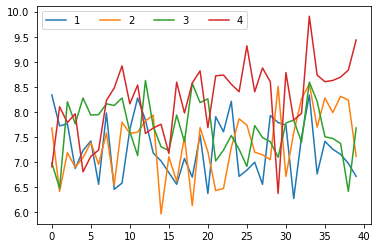

In [23]:
plt.plot(temp[indeks[0]:indeks[1]], label='1')
plt.plot(temp[indeks[1]:indeks[2]], label='2')
plt.plot(temp[indeks[2]:indeks[3]], label='3')
plt.plot(temp[indeks[3]:indeks[4]], label='4')
plt.legend(ncol=4)
plt.show()

Dette kan vi også gjøre med en for-løkke, så slipper vi så mange nesten like kodelinjer:

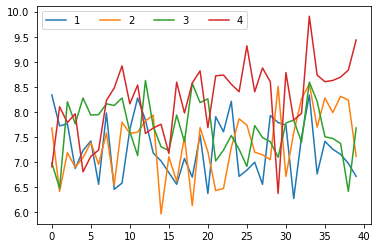

In [24]:
for i in range(4):
    plt.plot(temp[indeks[i]:indeks[i+1]], label=str(i+1))
plt.legend(ncol=4)
plt.show()


Fordelen med for-løkker er at man slipper å skrive så mange nesten helt like kode-linjer. 

I eksemplene over har vi brukt `for in in range(x)`. Da er `i` indeksen til hver iterasjon. Men man kan også la `i` være faktiske verdier slik som under:

In [ ]:
for val in indeks: 
    print(val)

Ved å bruke dette kan man gjøre for-løkken for plotting en del penere:

In [ ]:
diff=int(len(tid)/4) # Fordi vi vet at vi har delt tidsserien inn i fire like deler
diff

In [ ]:
for ind in indeks[:-1]:
    plt.plot(temp[ind:ind+diff], label=str(ind))
plt.legend(ncol=4)
plt.show()

I blant trenger man **både** en faktisk verdi **og** indeksen. Da kan man bruke `enumerate` istedet for `range`:

In [ ]:
for count, val in enumerate(indeks):
    print('count:', count, 'val:', val)

Ved å bruke dette kan man gjøre begge de to siste stegene vi har gjort over (1: konvertere til integers og 2: plotte) inne i samme løkke. 

In [ ]:
indeks=[
    0, 
    len(tid)*1/4, 
    len(tid)*2/4, 
    len(tid)*3/4,
    len(tid)
]
indeks

In [ ]:
for count, val in enumerate(indeks[:-1]):
    ind=int(val) # konverter indeksen til integer
    plt.plot(temp[ind:ind+diff], label=str(ind))

plt.legend(ncol=4)
plt.show()    


For å gjøre poenget med for-løkker enda tydeligere: Hva om vi vil beregne gjennomsnitt og standardavvik for ti-årsperiode, og så lage en figur over alle disse punktene?

In [ ]:
# lag ny indekseringsvektor: 
diff=10 # Fordi vi vet at vi vil se på tiårsperioder
indeks=np.arange(0, len(tid), diff) # Vi bruker np.arange fordi vi vet tidssteget vi vil ha
indeks

In [ ]:
for count, val in enumerate(indeks):
    mean=np.mean(temp[val:val+diff])
    std=np.std(temp[val:val+diff])
    tid_mean=tid[int(val+diff/2)] # Vi vil plotte punktene midt i perioden de representerer

    
    plt.plot(tid_mean, mean, 'rp')
    plt.plot(tid_mean, mean+std, 'cp')
    plt.plot(tid_mean, mean-std, 'cp')

Det ville vært lettere å se på denne figuren om det var linjer mellom punktene. For å få det til må vi lagre verdiene til `mean` og `std` i egne vektorer slik at vi kan plotte dem i sin helhet etter at vi har beregnet alle. 

In [ ]:
# Lag to vektorer som kan fylles med verdier: en for gjennomsnitt og en for std. 
mean=np.zeros(len(indeks))
std=np.zeros(len(indeks))
tid_mean=np.zeros(len(indeks))

In [ ]:
for count, val in enumerate(indeks):
    mean[count]=np.mean(temp[val:val+diff])
    std[count]=np.std(temp[val:val+diff])
    tid_mean[count]=tid[int(val+diff/2)]
    
    plt.plot(tid_mean[count], mean[count], 'rp')
    plt.plot(tid_mean[count], mean[count]+std[count], 'cp')
    plt.plot(tid_mean[count], mean[count]-std[count], 'cp')
    
plt.plot(tid_mean, mean, 'r')
plt.plot(tid_mean, mean+std, 'c')
plt.plot(tid_mean, mean-std, 'c')

### Andre løkker
Det finner flere løkker enn for-løkker, f.eks. `if-løkker`. Jeg tenker ikke at vi skal gå gjennom det nå (med mindre det er ønskelig), men her er et enkelt eksempel for å vise hvordan det fungerer:

In [ ]:
diff=3
if diff==3:
    print(diff)

In [ ]:
if diff==4:
    print(diff)
elif diff > 4:
    print(diff)
else:
    print('diff is not equal or larger than 4')

Vi kan bruke en if-løkke dersom vi f.eks. vil plotte en linje med punkter som skal være røde om det er varmere enn gjennomsnittet, og blå om det er kaldere enn gjennom snittet: 

In [ ]:
mean=np.mean(temp)

plt.plot(tid, temp)
for count, T in enumerate(temp):
    if T > mean:
        plt.plot(tid[count], T, 'rp')
    elif T < mean:
        plt.plot(tid[count], T, 'bp')

plt.hlines(mean, 1860, 2020, 'k', alpha=.3)
plt.show()

Her kunne man imidlertid også brukt indeksering:

In [ ]:
plt.plot(tid, temp)
plt.plot(tid[temp>mean], temp[temp>mean], 'rp')
plt.plot(tid[temp<mean], temp[temp<mean], 'bp')
plt.hlines(mean, 1860, 2020, 'k', alpha=.3)
plt.show()

## Del 3: Scatterplot

In [ ]:
file='PrecipVestlandYearlyNonan.txt'
precip, tid_p = loadData(file)

file='TempBergenYearlyNonan.txt'
temp,tid_t = loadData(file)

temp=np.squeeze(temp)
precip=np.squeeze(precip)

In [ ]:
print(tid_p[0])
print(tid_p[-1])
print(tid_t[0])
print(tid_t[-1])

start=np.nonzero(tid_t==tid_p[0]) # Finn indeksen der tid_t er lik det første året i tid_p
start=start[0][0] # [0][0] må med for å få tak i kun tallet

temp=temp[start:] # Slett starten av temperatur-tidsserien
tid_t=tid_t[start:]

In [ ]:
ax=plt.axes()
ax.scatter(temp,precip)
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
) 
plt.show()

In [ ]:
from matplotlib import cm # Denne pakken trengs for å lage fargeskalaen
cmap=cm.get_cmap('plasma',len(temp)) # cmap står for "colormap". Her definerer du hvilken fargeskala du vil bruke. 

colors = tid_t # Her definerer du at fargeskalaen skal basere seg på tidsvektoren din
ax=plt.axes()

# I linjen under plottes precip som en funksjon av temp, fargeskalaen settes til colors (definert rett over), fargekartet settes
# til cmap som du definerte over, og du setter min og makx grenser til fargeksalaen. 
sc=ax.scatter(temp,precip,c=colors,cmap=cmap,vmin=min(tid_t), vmax=max(tid_t)) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
) 
plt.colorbar(sc, label='År') # denne linjen gjør at fargeskalaen vises til høyre. 
plt.show()

Bytt om få skriptet over slik at tid er langs x-aksen, temperatur langs y-aksen, og nedbør er fargekodet.

In [ ]:
cmap=cm.get_cmap('YlGnBu',len(temp)) # cmap står for "colormap". Her definerer du hvilken fargeskala du vil bruke. 

colors = precip # Her definerer du at fargeskalaen skal basere seg på tidsvektoren din
ax=plt.axes()

# I linjen under plottes precip som en funksjon av temp, fargeskalaen settes til colors (definert rett over), fargekartet settes
# til cmap som du definerte over, og du setter min og makx grenser til fargeksalaen. 
sc=ax.scatter(tid_t,temp,c=colors,cmap=cmap,vmin=min(precip), vmax=max(precip)) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Temperatur [\u2103]',
    xlabel='År', # \u2103 er koden for grader celcius. 
) 
plt.colorbar(sc, label='Nedbør [mm]') # denne linjen gjør at fargeskalaen vises til høyre. 
plt.show()

In [ ]:
cmap=cm.get_cmap('OrRd',len(temp)) # cmap står for "colormap". Her definerer du hvilken fargeskala du vil bruke. 

colors = temp # Her definerer du at fargeskalaen skal basere seg på tidsvektoren din
ax=plt.axes()

# I linjen under plottes precip som en funksjon av temp, fargeskalaen settes til colors (definert rett over), fargekartet settes
# til cmap som du definerte over, og du setter min og makx grenser til fargeksalaen. 
sc=ax.scatter(tid_t,precip,c=colors,cmap=cmap,vmin=min(temp), vmax=max(temp)) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='År', # \u2103 er koden for grader celcius. 
) 
plt.colorbar(sc, label='Temperatur [\u2103]') # denne linjen gjør at fargeskalaen vises til høyre. 
plt.show()